<a href="https://colab.research.google.com/github/nishathore/Stock-Prediction/blob/main/stock_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install yfinance


In [7]:
import yfinance as yf

# Download historical data
ticker = 'AAPL'  # Ticker symbol for Apple Inc.
start_date = '2020-01-01'
end_date = '2021-12-31'
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(training_data_len), :]

# Create scaled training data
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


419/419 - 10s - loss: 0.0059 - 10s/epoch - 25ms/step


In [10]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 1s 1s/step


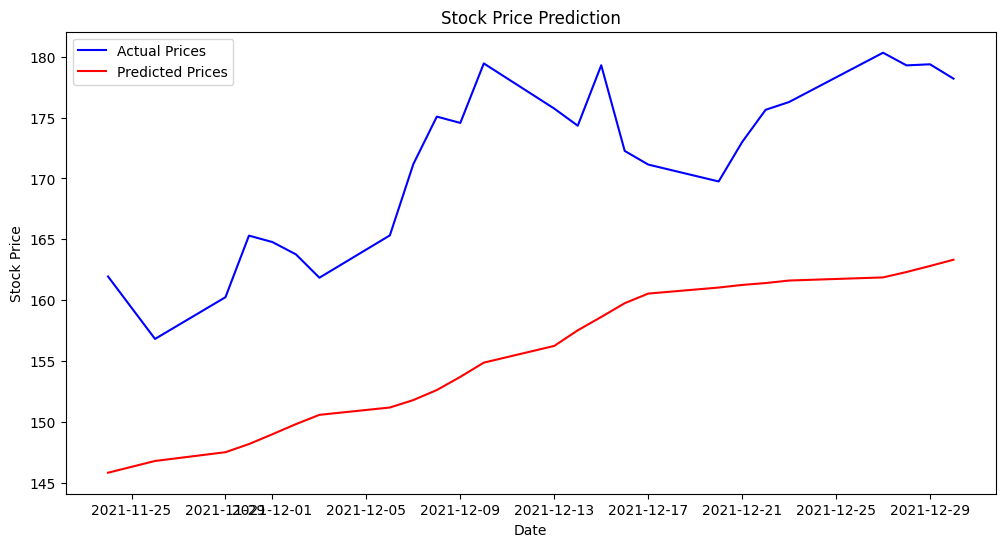

In [11]:
import matplotlib.pyplot as plt

# Plot actual prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[training_data_len:], y_test, label='Actual Prices', color='blue')

# Plot predicted prices
plt.plot(data.index[training_data_len:], predictions, label='Predicted Prices', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
